# Resampling Techniques for Handling Class Imbalance in Health Dataset

In [324]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler


from sklearn import metrics 

# Model Algorithms
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
rus = RandomUnderSampler(random_state=42)
nm1 = NearMiss(version=1)
nm2 = NearMiss(version=2)
nm3 = NearMiss(version=3)

#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)

In [325]:
data_path = r"D:\Desktop\ADA Intership\Group Project\datasets\\"

# 1. Read-In Data

In [326]:
anemia = pd.read_csv(data_path+"SANHANES 15_17 yrs for analysis_anemia outcome_08032023.csv")
odata = pd.read_csv(data_path+"odata2.csv", )
lung = pd.read_csv(data_path+"Lung.csv")
diabetes = pd.read_csv(data_path+"diabetes.csv")

In [327]:
anemia.head()

,province,famhist_HighBP,weight_perception,weighloss_attempt_pastyear,weightgain_attempt_pastyear,geotype,SBPfinal,DBPfinal,AGEfinal,Sex,foodexpense,familymembhungry_pastyear,distance_clinic,HHlivingcost,VitA,ferritin_res_edited,platelet_count_res1,hh_incomecat,bmi,sugarscore_cat,fruitscore_cat,NutriKnowA_cat,WHODASscore,HDL,mcv_res,aindex_cat,HbA1c,anemia_bin,Race,DDScat,Psych_dist2,Cursmoker,leafyveg,redmeat,CategoricalFatScore,physical_activity,Healthcare_access2yr,dwell_typ,medaid,WHratio_high,agric_animal,agric_crop,Hunger_cat
0,6,NaN,NaN,NaN,NaN,1,124.0,66.0,15,1,NaN,NaN,NaN,NaN,NaN,NaN,215,1,24.016193,NaN,NaN,NaN,NaN,1.04,86.0,NaN,5.7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,1,110.0,55.0,15,2,NaN,NaN,NaN,NaN,NaN,12.0,322,2,23.477585,NaN,NaN,NaN,NaN,1.80,88.4,NaN,5.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,8,NaN,NaN,NaN,NaN,1,116.0,67.0,15,2,4.0,2.0,1.0,1.0,NaN,14.0,260,2,36.881294,NaN,NaN,NaN,NaN,1.20,84.1,NaN,5.3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,1.0
3,2,NaN,NaN,NaN,NaN,2,112.0,59.0,15,2,NaN,NaN,NaN,NaN,NaN,NaN,244,1,22.313278,NaN,NaN,NaN,NaN,1.13,96.0,NaN,5.6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,3,129.0,71.0,15,2,9.0,2.0,1.0,1.0,0.55,NaN,324,2,26.206867,NaN,NaN,NaN,NaN,1.50,84.6,1.0,5.8,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,3.0


In [328]:
odata.head()

,geotype,AGEfinal,Sex,Race,hhinc2,aindex_cat,dwell_typ1,medaid1,agric_animal1,Hunger_cat1,weightloss_attempt,weightgain_attempt,SBPFINAL,Cursmoker,Psych_dist2,butterspread,scores_sugar,scores_fruit,NutriKnowA_cat,DDScat1,CategoricalFatScore1,physical_activity,Healthcare_access2yr,famhist_hbp,famhist_diabetes,famhist_heartdis,redmeat_wfat,milkserv_daily,snack_freq,overweight,AuditC3_MF1,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,3,17,2,1,2,2,1,1,2,1,2,2,2,2,2,3,3,3,2,1,1,1,1,2,2,2,1,5,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,15,1,1,1,1,1,2,2,2,2,2,2,2,2,3,1,2,2,1,2,2,1,1,2,2,1,3,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,15,1,1,1,2,1,2,2,3,2,1,2,2,2,4,3,2,3,1,1,2,2,1,1,2,1,3,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,15,2,3,2,2,1,2,2,1,2,2,1,2,2,5,1,2,2,1,2,2,2,1,1,1,2,5,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,15,2,1,2,1,1,2,2,1,2,2,1,2,1,3,3,2,2,2,1,1,2,1,1,2,1,4,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
lung.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [330]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Initial Data Exploration

In [331]:
def df_report(df):
    """This gives quick report about the missing values, unique numbers and datatypes.
    The argument is the DataFram
    """
    n_missing = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    n_unique = df.nunique()
    D_types = df.dtypes
    report = pd.concat([n_missing,n_unique,D_types],axis=1 ,keys= ["%_missing", "no_unique", "D_types"])
    return display(report)

In [332]:
#  first drop all duplicated records
anemia.drop_duplicates(inplace=True)
diabetes.drop_duplicates(inplace=True)
lung.drop_duplicates(inplace=True)
odata.drop_duplicates(inplace=True)

In [333]:
#print the dimension of the dataset
print("diabetes: %s rows and %s columns \n"%(diabetes.shape[0],diabetes.shape[1]))
print("anemia: %s rows and %s columns \n"%(anemia.shape[0],anemia.shape[1]))
print("lung: %s rows and %s columns \n"%(lung.shape[0],lung.shape[1]))
print("odata: %s rows and %s columns \n"%(odata.shape[0],odata.shape[1]))

diabetes: 768 rows and 9 columns 

anemia: 493 rows and 43 columns 

lung: 276 rows and 16 columns 

odata: 671 rows and 43 columns 



In [334]:
print("DIABETES")
df_report(diabetes)
print("ANEMIA")
df_report(anemia)
print("ODATA")
df_report(odata)
print("LUNG")
df_report(lung)

DIABETES


,%_missing,no_unique,D_types
Pregnancies,0.0,17,int64
Glucose,0.0,136,int64
BloodPressure,0.0,47,int64
SkinThickness,0.0,51,int64
Insulin,0.0,186,int64
BMI,0.0,248,float64
DiabetesPedigreeFunction,0.0,517,float64
Age,0.0,52,int64
Outcome,0.0,2,int64


ANEMIA


,%_missing,no_unique,D_types
VitA,69.979716,128,float64
ferritin_res_edited,63.286004,92,float64
aindex_cat,26.774848,4,float64
DDScat,23.935091,2,float64
HbA1c,17.241379,23,float64
NutriKnowA_cat,16.835700,3,float64
WHODASscore,15.212982,18,float64
CategoricalFatScore,14.807302,2,float64
sugarscore_cat,14.807302,3,float64
fruitscore_cat,12.170385,3,float64


ODATA


,%_missing,no_unique,D_types
Unnamed: 33,100.000000,0,float64
Unnamed: 36,100.000000,0,float64
Unnamed: 31,100.000000,0,float64
Unnamed: 32,100.000000,0,float64
Unnamed: 34,100.000000,0,float64
Unnamed: 35,100.000000,0,float64
Unnamed: 37,100.000000,0,float64
Unnamed: 42,98.360656,11,object
Unnamed: 38,98.360656,11,object
Unnamed: 39,98.360656,11,object


LUNG


,%_missing,no_unique,D_types
GENDER,0.0,2,object
AGE,0.0,39,int64
SMOKING,0.0,2,int64
YELLOW_FINGERS,0.0,2,int64
ANXIETY,0.0,2,int64
PEER_PRESSURE,0.0,2,int64
CHRONIC DISEASE,0.0,2,int64
FATIGUE,0.0,2,int64
ALLERGY,0.0,2,int64
WHEEZING,0.0,2,int64


- ---
<!--
<p>

**Data Types** <br>
* From the result shown above, it is clear to see that the data type of most variables/columns is <code>float</code> which is appropriate for our model to use.

**Missing Values**<br>
* Almost all columns of the data set contains missing values.

**no_uniques**<br>
* most of the variables are categorical/discretized qualitative variables.
* levels of categorical variables ranges from 2 to 10
</p>
-->

# 3. Exploratory Data Analysis

## Univariate exploration

### Target/Class distribution

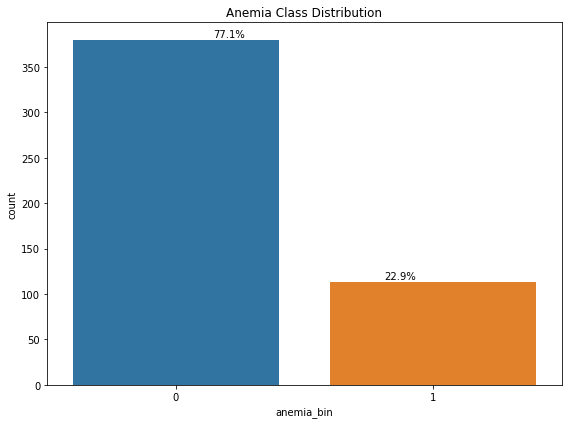

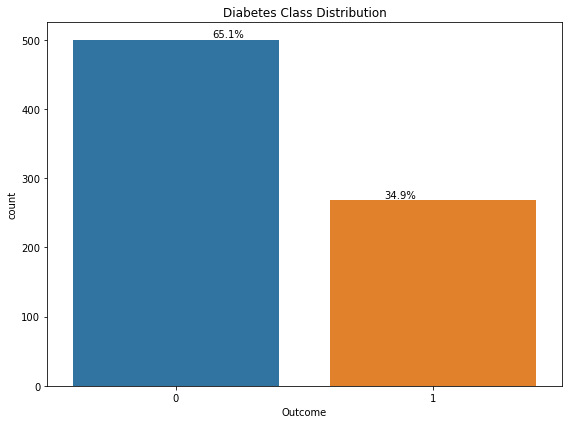

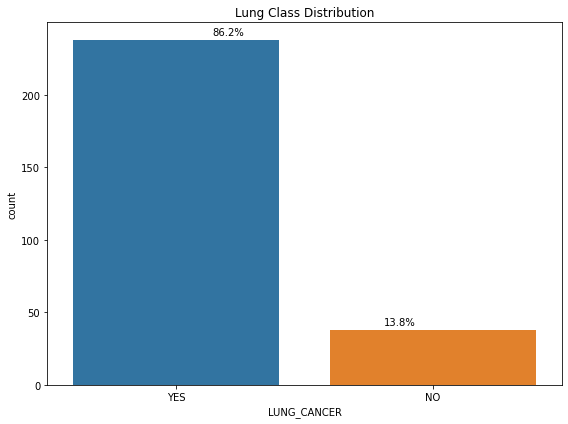

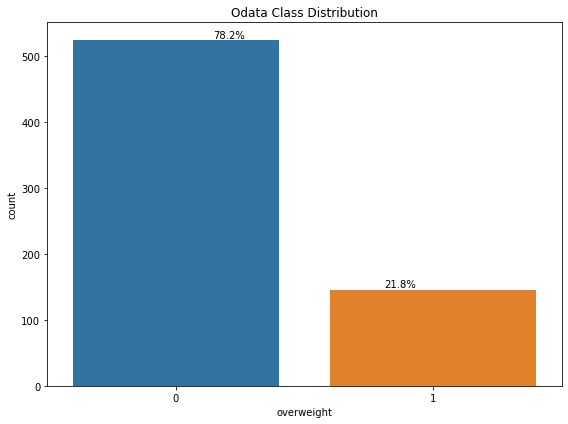

In [335]:
#plot the distribution of the target variable
title_list = ["Anemia", "Diabetes", "Lung", "Odata"]
for i, (target,data) in enumerate(zip(["anemia_bin", "Outcome", "LUNG_CANCER", "overweight"],
                       [anemia, diabetes, lung, odata])):
    plt.figure(figsize=(8,6))
    total = float(len(data))
    ax = sns.countplot(x=target, data=data)
    plt.title(f"{title_list[i]} Class Distribution")
    plt.xlabel(f"{target}")
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = (p.get_x() + p.get_width())/1.5
        y = p.get_height()+3.0
        ax.annotate(percentage, (x, y),ha='right')
    plt.tight_layout()

    # plt.savefig("class_distr.jpeg")
plt.show()

In [336]:
maj_class = []
min_class = []
imb_ratio = []
n_features = []

title_list = ["Anemia", "Diabetes", "Lung", "Odata"]
for target,data in zip(["anemia_bin", "Outcome", "LUNG_CANCER", "overweight"],
                       [anemia, diabetes, lung, odata]):
    maj = np.max(data[target].value_counts(ascending=False))
    minor = np.min(data[target].value_counts(ascending=False))
    ir = maj/minor
    n_col = data.shape[1]
    maj_class.append(maj)
    min_class.append(minor)
    imb_ratio.append(ir)
    n_features.append(n_col)
    
data_class_dist_df = pd.DataFrame({"Majority Class":maj_class, "Minority Class":min_class, 
                                   "Imbalance Ratio":np.round(imb_ratio,2), "No. of Features":n_features}, index=title_list)

data_class_dist_df

,Majority Class,Minority Class,Imbalance Ratio,No. of Features
Anemia,380,113,3.36,43
Diabetes,500,268,1.87,9
Lung,238,38,6.26,16
Odata,525,146,3.60,43


# 4. Data Partitioning
 This is necessary to have a set of data that will be used to evaluate our models to get the actual generalization score. 
To avoid a model that will be highly prone to overfitting: say we look at the test set, we may stumble upon some seemingly
interesting pattern in the test data that leads us to select a particular kind of Machine Learning mode and when we estimate the generalization score using the test set, our prediction will be too optimistic and we will launch a system that will not perform as well as expected. This is called data snooping bias.

Creating a test set is theoretically quite simple: just pick some instances randomly and ensured it is stratified (i.e equal ration of the target variable are assigned to the training and the test set). The test set is typically 20% of the
dataset which are set aside:

In [337]:
anemia_train, anemia_test = train_test_split(anemia, test_size=0.2, stratify=anemia["anemia_bin"], random_state=42)
diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.2, stratify=diabetes["Outcome"], random_state=42)
lung_train, lung_test = train_test_split(lung, test_size=0.2, stratify=lung["LUNG_CANCER"], random_state=42)
odata_train, odata_test = train_test_split(odata, test_size=0.2, stratify=odata["overweight"], random_state=42)

In [338]:
# check for the distribution of the classes among the sets
print("anemia_train: ", anemia_train["anemia_bin"].value_counts())
print("anemia_test: ", anemia_test["anemia_bin"].value_counts())
print("\ndiabetes_train:\n ",diabetes_train["Outcome"].value_counts())
print("\ndiabetes_test:\n ",diabetes_test["Outcome"].value_counts())
print("\nlung_train:\n ",lung_train["LUNG_CANCER"].value_counts())
print("\nlung_test:\n ",lung_test["LUNG_CANCER"].value_counts())
print("\nodata_train:\n ",odata_train["overweight"].value_counts())
print("\nodata_test:\n ",odata_test["overweight"].value_counts())

anemia_train:  0    304
1     90
Name: anemia_bin, dtype: int64
anemia_test:  0    76
1    23
Name: anemia_bin, dtype: int64

diabetes_train:
  0    400
1    214
Name: Outcome, dtype: int64

diabetes_test:
  0    100
1     54
Name: Outcome, dtype: int64

lung_train:
  YES    190
NO      30
Name: LUNG_CANCER, dtype: int64

lung_test:
  YES    48
NO      8
Name: LUNG_CANCER, dtype: int64

odata_train:
  0    419
1    117
Name: overweight, dtype: int64

odata_test:
  0    106
1     29
Name: overweight, dtype: int64


In [339]:
# generate data distribution after partition
train_part_df = (anemia_train["anemia_bin"].value_counts().to_frame().T).\
append(diabetes_train["Outcome"].value_counts().to_frame().T).\
append(lung_train["LUNG_CANCER"].value_counts().to_frame().T).\
append(odata_train["overweight"].value_counts().to_frame().T)

train_part_df.rename(index={'anemia_bin':"Anemia dataset", 'Outcome':"Diabetes dataset", 
                            'LUNG_CANCER':"Lung Cancer dataset", 'overweight':"Obesity dataset"},
                     columns={0:"class 0",1:"class 1"}, inplace=True)

test_part_df = (anemia_test["anemia_bin"].value_counts().to_frame().T).\
append(diabetes_test["Outcome"].value_counts().to_frame().T).\
append(lung_test["LUNG_CANCER"].value_counts().to_frame().T).\
append(odata_test["overweight"].value_counts().to_frame().T)

test_part_df.rename(index={'anemia_bin':"Anemia dataset", 'Outcome':"Diabetes dataset", 
                            'LUNG_CANCER':"Lung Cancer dataset", 'overweight':"Obesity dataset"},
                     columns={0:"class 0",1:"class 1"}, inplace=True)

train_part_df

,class 0,class 1,YES,NO
Anemia dataset,304.0,90.0,NaN,NaN
Diabetes dataset,400.0,214.0,NaN,NaN
Lung Cancer dataset,NaN,NaN,190.0,30.0
Obesity dataset,419.0,117.0,NaN,NaN


In [340]:
test_part_df

,class 0,class 1,YES,NO
Anemia dataset,76.0,23.0,NaN,NaN
Diabetes dataset,100.0,54.0,NaN,NaN
Lung Cancer dataset,NaN,NaN,48.0,8.0
Obesity dataset,106.0,29.0,NaN,NaN


In [341]:
df_report

<function __main__.df_report(df)>

# 5. Data Cleaning and Preparation

In [342]:
# drop unnamed columns in odata
odata_train.drop(columns=[col for col in odata.columns if col[:7]=="Unnamed"], inplace=True)
odata_test.drop(columns=[col for col in odata.columns if col[:7]=="Unnamed"], inplace=True)

In [343]:
df_report(odata_train)
df_report(odata_test)

,%_missing,no_unique,D_types
geotype,0.0,4,int64
scores_sugar,0.0,3,int64
overweight,0.0,2,int64
snack_freq,0.0,2,int64
milkserv_daily,0.0,5,int64
redmeat_wfat,0.0,2,int64
famhist_heartdis,0.0,2,int64
famhist_diabetes,0.0,2,int64
famhist_hbp,0.0,2,int64
Healthcare_access2yr,0.0,2,int64


,%_missing,no_unique,D_types
geotype,0.0,4,int64
scores_sugar,0.0,3,int64
overweight,0.0,2,int64
snack_freq,0.0,2,int64
milkserv_daily,0.0,5,int64
redmeat_wfat,0.0,2,int64
famhist_heartdis,0.0,2,int64
famhist_diabetes,0.0,2,int64
famhist_hbp,0.0,2,int64
Healthcare_access2yr,0.0,2,int64


### Missing Value Treatment using MICE

In [344]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge()).fit(anemia_train)
# slect categorical columns
cat_cols = [i for i in anemia.drop(columns="anemia_bin").columns if anemia[i].nunique() <= 10]

anemia_train_imp = pd.DataFrame(mice_imputer.transform(anemia_train), columns=anemia_train.columns)
anemia_test_imp = pd.DataFrame(mice_imputer.transform(anemia_test), columns=anemia_test.columns)
#  roundup imputed values to their nearing whole numbers
anemia_train_imp[cat_cols] = anemia_train_imp[cat_cols].round()
anemia_test_imp[cat_cols] = anemia_test_imp[cat_cols].round()

In [345]:
# anemia_save = pd.DataFrame(mice_imputer.transform(anemia), columns=anemia.columns)
# anemia_save[cat_cols] = anemia_save[cat_cols].round()
# anemia_save.to_csv("anemia_cleaned.csv", index=False)

**I feel it would make sense to roundup imputed values to their nearing whole numbers to retain the categorical nature of the variables**

In [346]:
anemia_train_imp.head()

,province,famhist_HighBP,weight_perception,weighloss_attempt_pastyear,weightgain_attempt_pastyear,geotype,SBPfinal,DBPfinal,AGEfinal,Sex,foodexpense,familymembhungry_pastyear,distance_clinic,HHlivingcost,VitA,ferritin_res_edited,platelet_count_res1,hh_incomecat,bmi,sugarscore_cat,fruitscore_cat,NutriKnowA_cat,WHODASscore,HDL,mcv_res,aindex_cat,HbA1c,anemia_bin,Race,DDScat,Psych_dist2,Cursmoker,leafyveg,redmeat,CategoricalFatScore,physical_activity,Healthcare_access2yr,dwell_typ,medaid,WHratio_high,agric_animal,agric_crop,Hunger_cat
0,3.0,2.0,2.0,2.0,2.0,1.0,115.000000,72.000000,16.0,1.0,7.0,2.0,1.0,3.0,1.140893,75.693043,431.0,3.0,18.670935,2.0,1.0,2.0,0.000000,1.08,96.0,2.0,5.9,0.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
1,6.0,2.0,2.0,2.0,2.0,4.0,116.262599,64.995715,15.0,2.0,4.0,1.0,1.0,1.0,1.076995,75.711224,329.0,1.0,21.274731,2.0,2.0,2.0,2.237295,1.29,93.0,3.0,5.7,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0
2,1.0,2.0,2.0,2.0,2.0,4.0,158.000000,72.000000,15.0,2.0,4.0,2.0,2.0,1.0,1.035947,61.000000,233.0,4.0,16.337807,2.0,2.0,3.0,2.185806,1.76,86.0,1.0,5.9,0.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0
3,2.0,1.0,2.0,2.0,2.0,1.0,125.000000,75.000000,17.0,2.0,5.0,1.0,3.0,1.0,1.026060,32.000000,329.0,1.0,27.474466,1.0,1.0,2.0,2.083333,1.74,100.0,1.0,5.3,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0
4,2.0,2.0,2.0,1.0,2.0,2.0,120.000000,71.000000,16.0,2.0,3.0,2.0,1.0,1.0,1.434390,132.000000,388.0,2.0,20.581106,1.0,1.0,2.0,4.166667,1.36,95.0,1.0,5.2,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0


In [347]:
anemia_test_imp.head()

,province,famhist_HighBP,weight_perception,weighloss_attempt_pastyear,weightgain_attempt_pastyear,geotype,SBPfinal,DBPfinal,AGEfinal,Sex,foodexpense,familymembhungry_pastyear,distance_clinic,HHlivingcost,VitA,ferritin_res_edited,platelet_count_res1,hh_incomecat,bmi,sugarscore_cat,fruitscore_cat,NutriKnowA_cat,WHODASscore,HDL,mcv_res,aindex_cat,HbA1c,anemia_bin,Race,DDScat,Psych_dist2,Cursmoker,leafyveg,redmeat,CategoricalFatScore,physical_activity,Healthcare_access2yr,dwell_typ,medaid,WHratio_high,agric_animal,agric_crop,Hunger_cat
0,7.0,2.0,2.0,2.0,2.0,1.0,97.0,54.0,15.0,2.0,6.0,1.0,1.0,2.0,0.975651,75.746547,173.0,1.0,21.295864,2.0,2.0,2.0,2.165888,1.50,89.1,3.0,5.410748,0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
1,8.0,2.0,2.0,2.0,2.0,2.0,100.0,73.0,17.0,1.0,9.0,2.0,3.0,2.0,1.035487,75.732425,265.0,3.0,18.867168,3.0,2.0,3.0,0.000000,1.10,84.4,3.0,5.547363,0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,8.0,2.0,2.0,2.0,2.0,3.0,106.0,71.0,17.0,2.0,5.0,2.0,2.0,2.0,0.850000,12.000000,200.0,3.0,25.555037,2.0,2.0,2.0,0.000000,1.30,87.4,2.0,5.478374,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,5.0,2.0,2.0,2.0,2.0,2.0,121.0,88.0,15.0,2.0,4.0,2.0,1.0,1.0,1.111763,75.707032,379.0,1.0,16.974653,3.0,3.0,2.0,2.083333,1.20,82.3,1.0,5.400000,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0
4,1.0,2.0,2.0,2.0,2.0,4.0,123.0,74.0,16.0,2.0,4.0,2.0,3.0,2.0,1.263380,160.000000,387.0,2.0,19.828552,2.0,2.0,1.0,0.000000,1.44,92.0,2.0,5.300000,0.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0


### Encoding

In [348]:
# Encode 'GENDER' and 'LUNG_CANCER' variables in lung dataset
lung_train['GENDER'] = lung_train['GENDER'].map({'M': 1, 'F': 0})
lung_train['LUNG_CANCER'] = lung_train['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
lung_test['GENDER'] = lung_test['GENDER'].map({'M': 1, 'F': 0})
lung_test['LUNG_CANCER'] = lung_test['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

### Assignment of Independent and Dependent Variables

In [349]:
X_train_anemia = anemia_train_imp[anemia_train_imp.drop(columns=["anemia_bin"]).columns]
X_test_anemia = anemia_test_imp[anemia_test_imp.drop(columns=["anemia_bin"]).columns]
y_train_anemia = anemia_train_imp["anemia_bin"]
y_test_anemia = anemia_test_imp["anemia_bin"]

X_train_diabetes = diabetes_train[diabetes_train.drop(columns=["Outcome"]).columns]
X_test_diabetes = diabetes_test[diabetes_test.drop(columns=["Outcome"]).columns]
y_train_diabetes = diabetes_train["Outcome"]
y_test_diabetes = diabetes_test["Outcome"]

X_train_lung = lung_train[lung_train.drop(columns=["LUNG_CANCER"]).columns]
X_test_lung = lung_test[lung_test.drop(columns=["LUNG_CANCER"]).columns]
y_train_lung = lung_train["LUNG_CANCER"]
y_test_lung = lung_test["LUNG_CANCER"]

X_train_odata = odata_train[odata_train.drop(columns=["overweight"]).columns]
X_test_odata = odata_test[odata_test.drop(columns=["overweight"]).columns]
y_train_odata = odata_train["overweight"]
y_test_odata = odata_test["overweight"]

# Model Before ReSampling

Metrics:

- Accuracy 
- F1-score 
- Matthew’s correlation coefficient (MCC) 
- Area Under the Curve (AUC)

In [350]:
x_unsampled_data_arrangement = [(X_train_lung, X_test_lung), (X_train_anemia, X_test_anemia),
                                (X_train_diabetes, X_test_diabetes), (X_train_odata, X_test_odata)]
y_unsampled_data_arrangement = [(y_train_lung, y_test_lung), (y_train_anemia, y_test_anemia),
                                (y_train_diabetes, y_test_diabetes), (y_train_odata, y_test_odata)]

data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]

index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]

presampling_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

# presampling_scores_df

In [351]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_unsampled_data_arrangement)):
        clf.fit(x_unsampled_data_arrangement[i][0], y_unsampled_data_arrangement[i][0])
        pred = clf.predict(x_unsampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_unsampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_unsampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_unsampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_unsampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_unsampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_unsampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_unsampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    presampling_scores_df[("Accuracy",clf_name)] = accuracy_list
    presampling_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    presampling_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    presampling_scores_df[("F1 score",clf_name)] = f1_score_list
    presampling_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.06it/s]


In [352]:
presampling_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.911           0.808   
                  SVM                                 0.857           0.768   
                  Bernouli Naive Bayes                0.857           0.768   
Balanced Accuracy Logistic Regression                 0.740           0.678   
                  SVM                                 0.500           0.500   
                  Bernouli Naive Bayes                0.500           0.500   
AUC-ROC           Logistic Regression                 0.948           0.847   
                  SVM                                 0.956           0.832   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.949           0.513   
                  SVM                                 0.923           0.000   
                  Bernouli Naive Bayes                0.923           0.000   
MCC               Logistic Regression                 0.588           0.408   
                  SVM                                 0.000           0.000   
                  Bernouli Naive Bayes                0.000           0.000   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.714            0.778  
                  SVM                              0.721            0.785  
                  Bernouli Naive Bayes             0.649            0.785  
Balanced Accuracy Logistic Regression              0.669            0.520  
                  SVM                              0.653            0.500  
                  Bernouli Naive Bayes             0.521            0.500  
AUC-ROC           Logistic Regression              0.824            0.690  
                  SVM                              0.784            0.580  
                  Bernouli Naive Bayes             0.536            0.500  
F1 score          Logistic Regression              0.560            0.118  
                  SVM                              0.517            0.000  
                  Bernouli Naive Bayes             0.156            0.000  
MCC               Logistic Regression              0.353            0.088  
                  SVM                              0.348            0.000  
                  Bernouli Naive Bayes             0.082            0.000

# Model with OVERSAMPLING

Oversampling Techniques to handle imbalance dataset include:
* SMOTE- Synthetic Minority Over-Sampling Technique
* MWMOTE- Majority Weighted Minority Oversampling Technique
* PDFOS- Probability Density Function Estimation Based Oversampling
* RWO-Random Walk Oversampling
* ADASYN- Adaptive synthetic sampling
* WRACOG-Wrapper for rapidly converging Gibbs algorithm

Metrics:

- Accuracy 
- F1-score 
- Matthew’s correlation coefficient (MCC) 
- Area Under the Curve (AUC)

In [353]:
from imblearn import over_sampling

# check for the distribution of the classes among the training sets
print("\nanemia_train:\n", y_train_anemia.value_counts())
print("\ndiabetes_train:\n",y_train_diabetes.value_counts())
print("\nlung_train:\n",y_train_lung.value_counts())
print("\nodata_train:\n",y_train_odata.value_counts())


anemia_train:
 0.0    304
1.0     90
Name: anemia_bin, dtype: int64

diabetes_train:
 0    400
1    214
Name: Outcome, dtype: int64

lung_train:
 1    190
0     30
Name: LUNG_CANCER, dtype: int64

odata_train:
 0    419
1    117
Name: overweight, dtype: int64


## SMOTE

In [354]:
sm = over_sampling.SMOTE(random_state=42) # SMOTE- Synthetic Minority Over-Sampling Technique
# fit
X_train_anemia_sm, y_train_anemia_sm = sm.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_sm, y_train_diabetes_sm = sm.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_sm, y_train_lung_sm = sm.fit_resample(X_train_lung, y_train_lung)
X_train_odata_sm, y_train_odata_sm = sm.fit_resample(X_train_odata, y_train_odata)

In [355]:
x_sampled_data_arrangement = [(X_train_lung_sm, X_test_lung), (X_train_anemia_sm, X_test_anemia),
                                (X_train_diabetes_sm, X_test_diabetes), (X_train_odata_sm, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_sm, y_test_lung), (y_train_anemia_sm, y_test_anemia),
                                (y_train_diabetes_sm, y_test_diabetes), (y_train_odata_sm, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
smote_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

smote_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [356]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    smote_scores_df[("Accuracy",clf_name)] = accuracy_list
    smote_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    smote_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    smote_scores_df[("F1 score",clf_name)] = f1_score_list
    smote_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.27it/s]


In [357]:
smote_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.911           0.727   
                  SVM                                 0.393           0.606   
                  Bernouli Naive Bayes                0.429           0.545   
Balanced Accuracy Logistic Regression                 0.792           0.731   
                  SVM                                 0.542           0.577   
                  Bernouli Naive Bayes                0.406           0.477   
AUC-ROC           Logistic Regression                 0.956           0.816   
                  SVM                                 0.711           0.652   
                  Bernouli Naive Bayes                0.406           0.477   
F1 score          Logistic Regression                 0.948           0.557   
                  SVM                                 0.485           0.381   
                  Bernouli Naive Bayes                0.568           0.262   
MCC               Logistic Regression                 0.617           0.402   
                  SVM                                 0.062           0.132   
                  Bernouli Naive Bayes               -0.132          -0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.734            0.652  
                  SVM                              0.695            0.644  
                  Bernouli Naive Bayes             0.584            0.785  
Balanced Accuracy Logistic Regression              0.727            0.553  
                  SVM                              0.684            0.573  
                  Bernouli Naive Bayes             0.544            0.500  
AUC-ROC           Logistic Regression              0.822            0.629  
                  SVM                              0.781            0.616  
                  Bernouli Naive Bayes             0.549            0.500  
F1 score          Logistic Regression              0.650            0.319  
                  SVM                              0.598            0.351  
                  Bernouli Naive Bayes             0.407            0.000  
MCC               Logistic Regression              0.440            0.095  
                  SVM                              0.357            0.128  
                  Bernouli Naive Bayes             0.087            0.000

## Random Oversampling

In [358]:
rw = over_sampling.RandomOverSampler(random_state=42) # RWO-Random Walk Oversampling
# fit
X_train_anemia_rw, y_train_anemia_rw = rw.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_rw, y_train_diabetes_rw = rw.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_rw, y_train_lung_rw = rw.fit_resample(X_train_lung, y_train_lung)
X_train_odata_rw, y_train_odata_rw = rw.fit_resample(X_train_odata, y_train_odata)

In [359]:
x_sampled_data_arrangement = [(X_train_lung_rw, X_test_lung), (X_train_anemia_rw, X_test_anemia),
                                (X_train_diabetes_rw, X_test_diabetes), (X_train_odata_rw, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_rw, y_test_lung), (y_train_anemia_rw, y_test_anemia),
                                (y_train_diabetes_rw, y_test_diabetes), (y_train_odata_rw, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
rwo_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

rwo_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [360]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    rwo_scores_df[("Accuracy",clf_name)] = accuracy_list
    rwo_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    rwo_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    rwo_scores_df[("F1 score",clf_name)] = f1_score_list
    rwo_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.17it/s]


In [361]:
rwo_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.875           0.747   
                  SVM                                 0.339           0.616   
                  Bernouli Naive Bayes                0.429           0.455   
Balanced Accuracy Logistic Regression                 0.927           0.760   
                  SVM                                 0.510           0.568   
                  Bernouli Naive Bayes                0.406           0.523   
AUC-ROC           Logistic Regression                 0.964           0.812   
                  SVM                                 0.685           0.668   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.921           0.590   
                  SVM                                 0.413           0.367   
                  Bernouli Naive Bayes                0.568           0.357   
MCC               Logistic Regression                 0.675           0.451   
                  SVM                                 0.016           0.119   
                  Bernouli Naive Bayes               -0.132           0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.734            0.667  
                  SVM                              0.701            0.607  
                  Bernouli Naive Bayes             0.578            0.785  
Balanced Accuracy Logistic Regression              0.727            0.688  
                  SVM                              0.685            0.612  
                  Bernouli Naive Bayes             0.539            0.500  
AUC-ROC           Logistic Regression              0.823            0.724  
                  SVM                              0.783            0.688  
                  Bernouli Naive Bayes             0.547            0.500  
F1 score          Logistic Regression              0.650            0.483  
                  SVM                              0.596            0.404  
                  Bernouli Naive Bayes             0.404            0.000  
MCC               Logistic Regression              0.440            0.311  
                  SVM                              0.362            0.186  
                  Bernouli Naive Bayes             0.077            0.000

## ADASYN- Adaptive synthetic sampling

In [362]:
ad = over_sampling.ADASYN(random_state=42) # ADASYN- Adaptive synthetic sampling
# fit
X_train_anemia_ad, y_train_anemia_ad = ad.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_ad, y_train_diabetes_ad = ad.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_ad, y_train_lung_ad = ad.fit_resample(X_train_lung, y_train_lung)
X_train_odata_ad, y_train_odata_ad = ad.fit_resample(X_train_odata, y_train_odata)

In [363]:
x_sampled_data_arrangement = [(X_train_lung_ad, X_test_lung), (X_train_anemia_ad, X_test_anemia),
                                (X_train_diabetes_ad, X_test_diabetes), (X_train_odata_ad, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_ad, y_test_lung), (y_train_anemia_ad, y_test_anemia),
                                (y_train_diabetes_ad, y_test_diabetes), (y_train_odata_ad, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
ad_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

ad_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [364]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    ad_scores_df[("Accuracy",clf_name)] = accuracy_list
    ad_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    ad_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    ad_scores_df[("F1 score",clf_name)] = f1_score_list
    ad_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.26it/s]


In [365]:
ad_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.929           0.758   
                  SVM                                 0.393           0.626   
                  Bernouli Naive Bayes                0.429           0.545   
Balanced Accuracy Logistic Regression                 0.802           0.751   
                  SVM                                 0.646           0.575   
                  Bernouli Naive Bayes                0.406           0.477   
AUC-ROC           Logistic Regression                 0.953           0.778   
                  SVM                                 0.701           0.674   
                  Bernouli Naive Bayes                0.406           0.477   
F1 score          Logistic Regression                 0.959           0.586   
                  SVM                                 0.452           0.373   
                  Bernouli Naive Bayes                0.568           0.262   
MCC               Logistic Regression                 0.684           0.444   
                  SVM                                 0.236           0.131   
                  Bernouli Naive Bayes               -0.132          -0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.747            0.667  
                  SVM                              0.688            0.667  
                  Bernouli Naive Bayes             0.610            0.215  
Balanced Accuracy Logistic Regression              0.750            0.587  
                  SVM                              0.679            0.587  
                  Bernouli Naive Bayes             0.551            0.500  
AUC-ROC           Logistic Regression              0.826            0.656  
                  SVM                              0.780            0.635  
                  Bernouli Naive Bayes             0.594            0.500  
F1 score          Logistic Regression              0.678            0.366  
                  SVM                              0.593            0.366  
                  Bernouli Naive Bayes             0.388            0.354  
MCC               Logistic Regression              0.481            0.155  
                  SVM                              0.347            0.155  
                  Bernouli Naive Bayes             0.108            0.000

## Borderline-SMOTE 

In [366]:
bsm = over_sampling.BorderlineSMOTE(random_state=42) # Borderline-SMOTE
# fit
X_train_anemia_bsm, y_train_anemia_bsm = bsm.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_bsm, y_train_diabetes_bsm = bsm.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_bsm, y_train_lung_bsm = bsm.fit_resample(X_train_lung, y_train_lung)
X_train_odata_bsm, y_train_odata_bsm = bsm.fit_resample(X_train_odata, y_train_odata)

In [367]:
x_sampled_data_arrangement = [(X_train_lung_bsm, X_test_lung), (X_train_anemia_bsm, X_test_anemia),
                                (X_train_diabetes_bsm, X_test_diabetes), (X_train_odata_bsm, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_bsm, y_test_lung), (y_train_anemia_bsm, y_test_anemia),
                                (y_train_diabetes_bsm, y_test_diabetes), (y_train_odata_bsm, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
bsm_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

bsm_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [368]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    bsm_scores_df[("Accuracy",clf_name)] = accuracy_list
    bsm_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    bsm_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    bsm_scores_df[("F1 score",clf_name)] = f1_score_list
    bsm_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.31it/s]


In [369]:
bsm_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.911           0.758   
                  SVM                                 0.393           0.616   
                  Bernouli Naive Bayes                0.429           0.232   
Balanced Accuracy Logistic Regression                 0.740           0.751   
                  SVM                                 0.542           0.568   
                  Bernouli Naive Bayes                0.406           0.500   
AUC-ROC           Logistic Regression                 0.956           0.843   
                  SVM                                 0.677           0.661   
                  Bernouli Naive Bayes                0.406           0.477   
F1 score          Logistic Regression                 0.949           0.586   
                  SVM                                 0.485           0.367   
                  Bernouli Naive Bayes                0.568           0.377   
MCC               Logistic Regression                 0.588           0.444   
                  SVM                                 0.062           0.119   
                  Bernouli Naive Bayes               -0.132           0.000   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.740            0.689  
                  SVM                              0.675            0.674  
                  Bernouli Naive Bayes             0.558            0.785  
Balanced Accuracy Logistic Regression              0.753            0.589  
                  SVM                              0.686            0.554  
                  Bernouli Naive Bayes             0.566            0.500  
AUC-ROC           Logistic Regression              0.814            0.651  
                  SVM                              0.776            0.614  
                  Bernouli Naive Bayes             0.595            0.500  
F1 score          Logistic Regression              0.683            0.364  
                  SVM                              0.609            0.312  
                  Bernouli Naive Bayes             0.485            0.000  
MCC               Logistic Regression              0.484            0.164  
                  SVM                              0.355            0.102  
                  Bernouli Naive Bayes             0.127            0.000

## Borderline-SMOTE SVM

In [370]:
bsvm = over_sampling.SVMSMOTE(random_state=42) # Borderline-SMOTE SVM
# fit
X_train_anemia_bsvm, y_train_anemia_bsvm = bsvm.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_bsvm, y_train_diabetes_bsvm = bsvm.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_bsvm, y_train_lung_bsvm = bsvm.fit_resample(X_train_lung, y_train_lung)
X_train_odata_bsvm, y_train_odata_bsvm = bsvm.fit_resample(X_train_odata, y_train_odata)

In [371]:
x_sampled_data_arrangement = [(X_train_lung_bsvm, X_test_lung), (X_train_anemia_bsvm, X_test_anemia),
                                (X_train_diabetes_bsvm, X_test_diabetes), (X_train_odata_bsvm, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_bsvm, y_test_lung), (y_train_anemia_bsvm, y_test_anemia),
                                (y_train_diabetes_bsvm, y_test_diabetes), (y_train_odata_bsvm, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
bsvm_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

bsvm_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [372]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    bsvm_scores_df[("Accuracy",clf_name)] = accuracy_list
    bsvm_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    bsvm_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    bsvm_scores_df[("F1 score",clf_name)] = f1_score_list
    bsvm_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  5.83it/s]


In [373]:
bsvm_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.929           0.778   
                  SVM                                 0.857           0.667   
                  Bernouli Naive Bayes                0.429           0.545   
Balanced Accuracy Logistic Regression                 0.802           0.734   
                  SVM                                 0.500           0.571   
                  Bernouli Naive Bayes                0.406           0.477   
AUC-ROC           Logistic Regression                 0.961           0.836   
                  SVM                                 0.841           0.662   
                  Bernouli Naive Bayes                0.406           0.477   
F1 score          Logistic Regression                 0.959           0.577   
                  SVM                                 0.923           0.353   
                  Bernouli Naive Bayes                0.568           0.262   
MCC               Logistic Regression                 0.684           0.434   
                  SVM                                 0.000           0.133   
                  Bernouli Naive Bayes               -0.132          -0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.727            0.659  
                  SVM                              0.688            0.681  
                  Bernouli Naive Bayes             0.526            0.785  
Balanced Accuracy Logistic Regression              0.722            0.545  
                  SVM                              0.679            0.522  
                  Bernouli Naive Bayes             0.503            0.500  
AUC-ROC           Logistic Regression              0.813            0.634  
                  SVM                              0.775            0.600  
                  Bernouli Naive Bayes             0.515            0.500  
F1 score          Logistic Regression              0.644            0.303  
                  SVM                              0.593            0.246  
                  Bernouli Naive Bayes             0.387            0.000  
MCC               Logistic Regression              0.430            0.083  
                  SVM                              0.347            0.044  
                  Bernouli Naive Bayes             0.006            0.000

# Result Summary

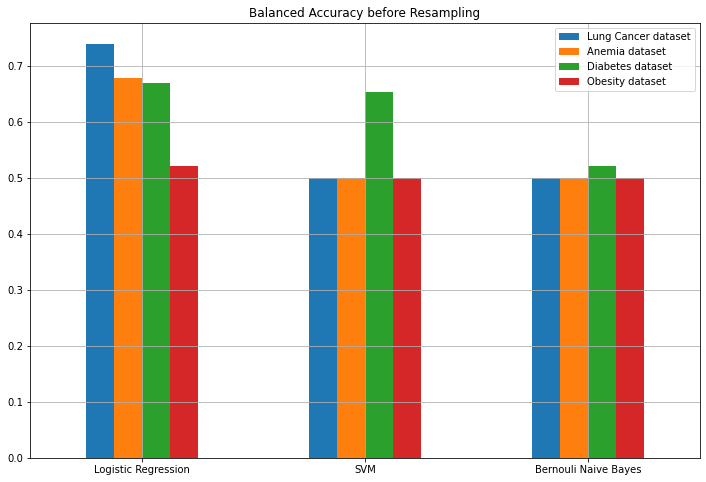

In [374]:
presampling_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy before Resampling")
plt.grid()
plt.xticks(rotation=0)

plt.savefig("Balanced Accuracy before Resampling.jpg", bbox_inches='tight')

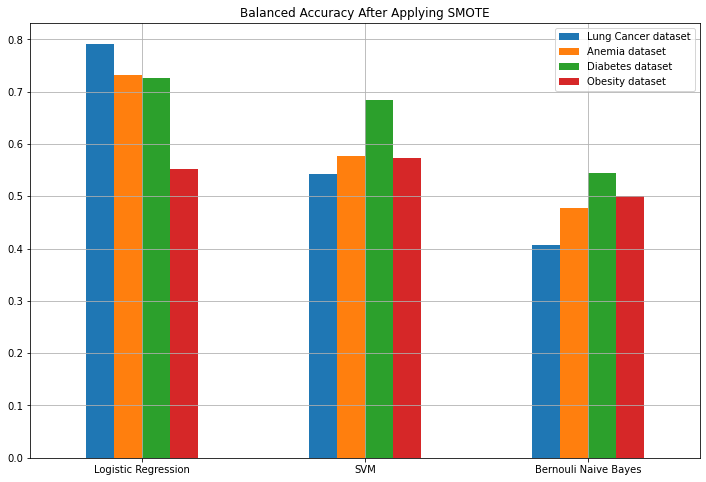

In [375]:
smote_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying SMOTE")
plt.grid()
plt.xticks(rotation=0)

plt.savefig("Balanced Accuracy After Applying SMOTE.jpg", bbox_inches='tight')

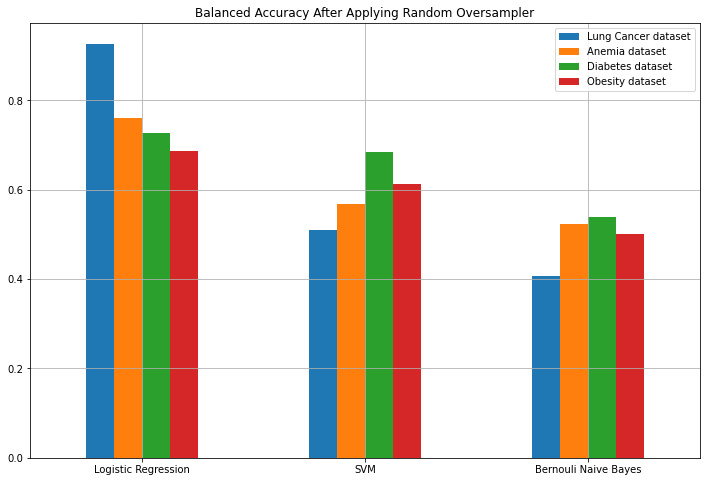

In [376]:
rwo_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Random Oversampler")
plt.grid(which='major')
plt.xticks(rotation=0)

plt.savefig("Balanced Accuracy After Applying Random Oversampler.jpg", bbox_inches='tight')

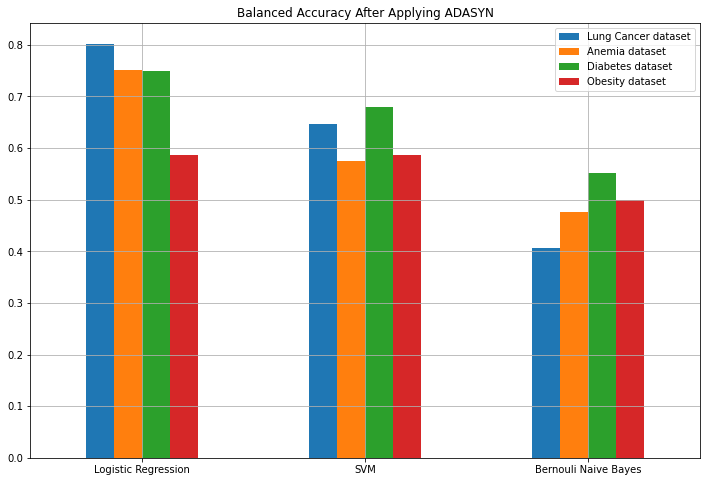

In [377]:
ad_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying ADASYN")
plt.grid()
plt.xticks(rotation=0)

plt.savefig("Balanced Accuracy After Applying ADASYN.jpg", bbox_inches='tight')

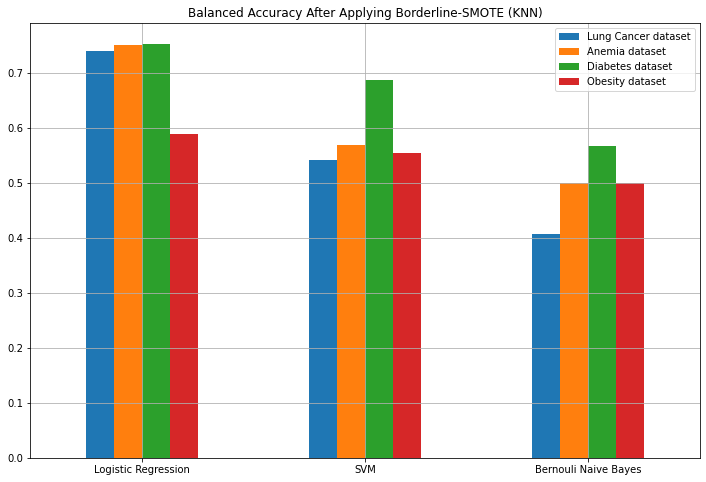

In [378]:
bsm_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Borderline-SMOTE (KNN)")
plt.grid()
plt.xticks(rotation=0)
plt.savefig("Balanced Accuracy After Applying Borderline-SMOTE (KNN).jpg", bbox_inches='tight')

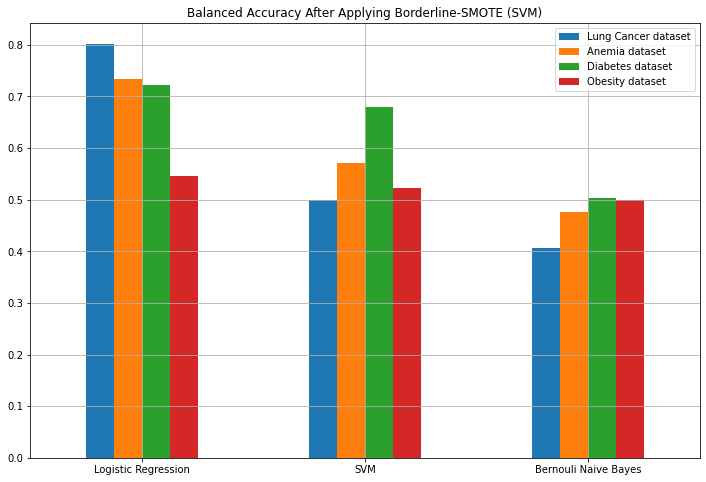

In [379]:
bsvm_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Borderline-SMOTE (SVM)")
plt.grid()
plt.xticks(rotation=0)
plt.savefig("Balanced Accuracy After Applying Borderline-SMOTE (SVM).jpg", bbox_inches='tight')

# References

- [1] N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, "SMOTE:
   synthetic minority over-sampling technique," Journal of artificial
   intelligence research, 321-357, 2002.

- [2] H. M. Nguyen, E. W. Cooper, K. Kamei, "Borderline over-sampling for
   imbalanced data classification," International Journal of Knowledge
   Engineering and Soft Data Paradigms, 3(1), pp.4-21, 2009.
- [3] https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# Model with UNDERSAMPLING

Undersampling Techniques to handle imbalance dataset include:
* NearMiss
* Random under sampling
* Edited Nearest Neighbors
* Repeated Edited Nearest Neighbors
* Condensed Nearest Neighbors

Metrics:

- Accuracy 
- F1-score 
- Matthew’s correlation coefficient (MCC) 
- Area Under the Curve (AUC)

# NearMiss

In [380]:
nm1 = NearMiss(version=1) 
# fit
X_train_anemia_nm, y_train_anemia_nm = nm1.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_nm, y_train_diabetes_nm = nm1.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_nm, y_train_lung_nm = nm1.fit_resample(X_train_lung, y_train_lung)
X_train_odata_nm, y_train_odata_nm = nm1.fit_resample(X_train_odata, y_train_odata)

In [381]:
x_sampled_data_arrangement = [(X_train_lung_nm, X_test_lung), (X_train_anemia_nm, X_test_anemia),
                                (X_train_diabetes_nm, X_test_diabetes), (X_train_odata_nm, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_nm, y_test_lung), (y_train_anemia_nm, y_test_anemia),
                                (y_train_diabetes_nm, y_test_diabetes), (y_train_odata_nm, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
nearmiss_score_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

nearmiss_score_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [382]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    nearmiss_score_df[("Accuracy",clf_name)] = accuracy_list
    nearmiss_score_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    nearmiss_score_df[("AUC-ROC",clf_name)] = auc_roc_list
    nearmiss_score_df[("F1 score",clf_name)] = f1_score_list
    nearmiss_score_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.59it/s]


In [383]:
nearmiss_score_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.750           0.576   
                  SVM                                 0.839           0.616   
                  Bernouli Naive Bayes                0.429           0.455   
Balanced Accuracy Logistic Regression                 0.646           0.602   
                  SVM                                 0.542           0.568   
                  Bernouli Naive Bayes                0.406           0.523   
AUC-ROC           Logistic Regression                 0.828           0.720   
                  SVM                                 0.379           0.590   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.844           0.417   
                  SVM                                 0.911           0.367   
                  Bernouli Naive Bayes                0.568           0.357   
MCC               Logistic Regression                 0.236           0.173   
                  SVM                                 0.130           0.119   
                  Bernouli Naive Bayes               -0.132           0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.714            0.541  
                  SVM                              0.695            0.541  
                  Bernouli Naive Bayes             0.448            0.785  
Balanced Accuracy Logistic Regression              0.716            0.595  
                  SVM                              0.676            0.570  
                  Bernouli Naive Bayes             0.456            0.500  
AUC-ROC           Logistic Regression              0.790            0.657  
                  SVM                              0.728            0.630  
                  Bernouli Naive Bayes             0.417            0.500  
F1 score          Logistic Regression              0.639            0.392  
                  SVM                              0.584            0.367  
                  Bernouli Naive Bayes             0.380            0.000  
MCC               Logistic Regression              0.415            0.156  
                  SVM                              0.345            0.115  
                  Bernouli Naive Bayes            -0.085            0.000

# Random Undersampling

In [384]:
rw = RandomUnderSampler(random_state=42) # RWO-Random Walk Oversampling
# fit
X_train_anemia_rw, y_train_anemia_rw = rw.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_rw, y_train_diabetes_rw = rw.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_rw, y_train_lung_rw = rw.fit_resample(X_train_lung, y_train_lung)
X_train_odata_rw, y_train_odata_rw = rw.fit_resample(X_train_odata, y_train_odata)

In [385]:
x_sampled_data_arrangement = [(X_train_lung_rw, X_test_lung), (X_train_anemia_rw, X_test_anemia),
                                (X_train_diabetes_rw, X_test_diabetes), (X_train_odata_rw, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_rw, y_test_lung), (y_train_anemia_rw, y_test_anemia),
                                (y_train_diabetes_rw, y_test_diabetes), (y_train_odata_rw, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
rwu_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

rwu_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [386]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    rwu_scores_df[("Accuracy",clf_name)] = accuracy_list
    rwu_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    rwu_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    rwu_scores_df[("F1 score",clf_name)] = f1_score_list
    rwu_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.20it/s]


In [387]:
rwu_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.839           0.717   
                  SVM                                 0.375           0.677   
                  Bernouli Naive Bayes                0.429           0.455   
Balanced Accuracy Logistic Regression                 0.906           0.710   
                  SVM                                 0.531           0.592   
                  Bernouli Naive Bayes                0.406           0.523   
AUC-ROC           Logistic Regression                 0.969           0.797   
                  SVM                                 0.333           0.603   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.897           0.533   
                  SVM                                 0.462           0.385   
                  Bernouli Naive Bayes                0.568           0.357   
MCC               Logistic Regression                 0.618           0.366   
                  SVM                                 0.048           0.171   
                  Bernouli Naive Bayes               -0.132           0.041   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.734            0.630  
                  SVM                              0.688            0.541  
                  Bernouli Naive Bayes             0.591            0.785  
Balanced Accuracy Logistic Regression              0.731            0.664  
                  SVM                              0.683            0.607  
                  Bernouli Naive Bayes             0.544            0.500  
AUC-ROC           Logistic Regression              0.817            0.729  
                  SVM                              0.766            0.663  
                  Bernouli Naive Bayes             0.566            0.500  
F1 score          Logistic Regression              0.655            0.457  
                  SVM                              0.600            0.404  
                  Bernouli Naive Bayes             0.400            0.000  
MCC               Logistic Regression              0.447            0.270  
                  SVM                              0.354            0.177  
                  Bernouli Naive Bayes             0.090            0.000

# EditedNearestNeighbours

In [388]:
enn = EditedNearestNeighbours()
# fit
X_train_anemia_enn, y_train_anemia_enn = enn.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_enn, y_train_diabetes_enn = enn.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_enn, y_train_lung_enn = enn.fit_resample(X_train_lung, y_train_lung)
X_train_odata_enn, y_train_odata_enn = enn.fit_resample(X_train_odata, y_train_odata)

In [389]:
x_sampled_data_arrangement = [(X_train_lung_enn, X_test_lung), (X_train_anemia_enn, X_test_anemia),
                                (X_train_diabetes_enn, X_test_diabetes), (X_train_odata_enn, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_enn, y_test_lung), (y_train_anemia_enn, y_test_anemia),
                                (y_train_diabetes_enn, y_test_diabetes), (y_train_odata_enn, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
enn_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

enn_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [390]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    enn_scores_df[("Accuracy",clf_name)] = accuracy_list
    enn_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    enn_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    enn_scores_df[("F1 score",clf_name)] = f1_score_list
    enn_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.78it/s]


In [391]:
enn_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.946           0.758   
                  SVM                                 0.857           0.788   
                  Bernouli Naive Bayes                0.857           0.768   
Balanced Accuracy Logistic Regression                 0.969           0.736   
                  SVM                                 0.500           0.574   
                  Bernouli Naive Bayes                0.500           0.500   
AUC-ROC           Logistic Regression                 0.984           0.827   
                  SVM                                 0.911           0.634   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.968           0.571   
                  SVM                                 0.923           0.276   
                  Bernouli Naive Bayes                0.923           0.000   
MCC               Logistic Regression                 0.826           0.423   
                  SVM                                 0.000           0.261   
                  Bernouli Naive Bayes                0.000           0.000   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.727            0.704  
                  SVM                              0.669            0.785  
                  Bernouli Naive Bayes             0.532            0.785  
Balanced Accuracy Logistic Regression              0.760            0.623  
                  SVM                              0.702            0.500  
                  Bernouli Naive Bayes             0.551            0.500  
AUC-ROC           Logistic Regression              0.821            0.685  
                  SVM                              0.762            0.675  
                  Bernouli Naive Bayes             0.536            0.500  
F1 score          Logistic Regression              0.691            0.412  
                  SVM                              0.633            0.000  
                  Bernouli Naive Bayes             0.478            0.000  
MCC               Logistic Regression              0.498            0.224  
                  SVM                              0.388            0.000  
                  Bernouli Naive Bayes             0.097            0.000

# RepeatedEditedNearestNeighbours

In [392]:
renn = RepeatedEditedNearestNeighbours() # Borderline-SMOTE
# fit
X_train_anemia_renn, y_train_anemia_renn = enn.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_renn, y_train_diabetes_renn = enn.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_renn, y_train_lung_renn = enn.fit_resample(X_train_lung, y_train_lung)
X_train_odata_renn, y_train_odata_renn = enn.fit_resample(X_train_odata, y_train_odata)

In [393]:
x_sampled_data_arrangement = [(X_train_lung_renn, X_test_lung), (X_train_anemia_renn, X_test_anemia),
                                (X_train_diabetes_renn, X_test_diabetes), (X_train_odata_renn, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_renn, y_test_lung), (y_train_anemia_renn, y_test_anemia),
                                (y_train_diabetes_renn, y_test_diabetes), (y_train_odata_renn, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
renn_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

renn_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [394]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    renn_scores_df[("Accuracy",clf_name)] = accuracy_list
    renn_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    renn_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    renn_scores_df[("F1 score",clf_name)] = f1_score_list
    renn_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.90it/s]


In [395]:
renn_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.946           0.758   
                  SVM                                 0.857           0.788   
                  Bernouli Naive Bayes                0.857           0.768   
Balanced Accuracy Logistic Regression                 0.969           0.736   
                  SVM                                 0.500           0.574   
                  Bernouli Naive Bayes                0.500           0.500   
AUC-ROC           Logistic Regression                 0.984           0.827   
                  SVM                                 0.911           0.634   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.968           0.571   
                  SVM                                 0.923           0.276   
                  Bernouli Naive Bayes                0.923           0.000   
MCC               Logistic Regression                 0.826           0.423   
                  SVM                                 0.000           0.261   
                  Bernouli Naive Bayes                0.000           0.000   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.727            0.704  
                  SVM                              0.669            0.785  
                  Bernouli Naive Bayes             0.532            0.785  
Balanced Accuracy Logistic Regression              0.760            0.623  
                  SVM                              0.702            0.500  
                  Bernouli Naive Bayes             0.551            0.500  
AUC-ROC           Logistic Regression              0.821            0.685  
                  SVM                              0.762            0.675  
                  Bernouli Naive Bayes             0.536            0.500  
F1 score          Logistic Regression              0.691            0.412  
                  SVM                              0.633            0.000  
                  Bernouli Naive Bayes             0.478            0.000  
MCC               Logistic Regression              0.498            0.224  
                  SVM                              0.388            0.000  
                  Bernouli Naive Bayes             0.097            0.000

# CondensedNearestNeighbour

In [396]:
cnn = CondensedNearestNeighbour(random_state=0) # Borderline-SMOTE SVM
# fit
X_train_anemia_cnn, y_train_anemia_cnn = enn.fit_resample(X_train_anemia, y_train_anemia)
X_train_diabetes_cnn, y_train_diabetes_cnn = enn.fit_resample(X_train_diabetes, y_train_diabetes)
X_train_lung_cnn, y_train_lung_cnn = enn.fit_resample(X_train_lung, y_train_lung)
X_train_odata_cnn, y_train_odata_cnn = enn.fit_resample(X_train_odata, y_train_odata)

In [397]:
x_sampled_data_arrangement = [(X_train_lung_cnn, X_test_lung), (X_train_anemia_cnn, X_test_anemia),
                                (X_train_diabetes_cnn, X_test_diabetes), (X_train_odata_cnn, X_test_odata)]
y_sampled_data_arrangement = [(y_train_lung_cnn, y_test_lung), (y_train_anemia_cnn, y_test_anemia),
                                (y_train_diabetes_cnn, y_test_diabetes), (y_train_odata_cnn, y_test_odata)]
index = [['Accuracy', 'Accuracy','Accuracy',
          'Balanced Accuracy', 'Balanced Accuracy','Balanced Accuracy',
          'AUC-ROC', 'AUC-ROC', 'AUC-ROC', 'F1 score', 
          'F1 score', 'F1 score',
          'MCC', 'MCC', 'MCC'
          ],
         ['Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes',
          'Logistic Regression', 'SVM','Bernouli Naive Bayes'
         ]]
data_name_arrangement = ["Lung Cancer dataset", "Anemia dataset", "Diabetes dataset", "Obesity dataset"]
cnn_scores_df = pd.DataFrame(index=index,columns=data_name_arrangement).T



models = [("Logistic Regression", LogisticRegression(random_state = 42)),
          ("SVM", SVC(random_state = 42, probability=True)),
          ("Bernouli Naive Bayes", BernoulliNB())
         ]

cnn_scores_df

Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                      Balanced Accuracy                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                AUC-ROC                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                               F1 score                            \
                    Logistic Regression  SVM Bernouli Naive Bayes   
Lung Cancer dataset                 NaN  NaN                  NaN   
Anemia dataset                      NaN  NaN                  NaN   
Diabetes dataset                    NaN  NaN                  NaN   
Obesity dataset                     NaN  NaN                  NaN   

                                    MCC                            
                    Logistic Regression  SVM Bernouli Naive Bayes  
Lung Cancer dataset                 NaN  NaN                  NaN  
Anemia dataset                      NaN  NaN                  NaN  
Diabetes dataset                    NaN  NaN                  NaN  
Obesity dataset                     NaN  NaN                  NaN

In [398]:
for clf_name, clf in tqdm(models):
    accuracy_list = []
    balanced_accuracy_list = []
    auc_roc_list = []
    f1_score_list = []
    mcc_list = []
    for i in range(len(x_sampled_data_arrangement)):
        clf.fit(x_sampled_data_arrangement[i][0], y_sampled_data_arrangement[i][0])
        pred = clf.predict(x_sampled_data_arrangement[i][1])
        pred_prob = clf.predict_proba(x_sampled_data_arrangement[i][1])[:,1]
        
        # get evaluation scores
        fpr, tpr, _ = metrics.roc_curve(y_sampled_data_arrangement[i][1], pred_prob)
        auc = metrics.auc(fpr, tpr)
        acc_score = metrics.accuracy_score(y_sampled_data_arrangement[i][1],pred)
        bal_acc = metrics.balanced_accuracy_score(y_sampled_data_arrangement[i][1],pred)
        recall = metrics.recall_score(y_sampled_data_arrangement[i][1],pred)
        matt_coeff = metrics.matthews_corrcoef(y_sampled_data_arrangement[i][1], pred)
        f1_score = metrics.f1_score(y_sampled_data_arrangement[i][1],pred)
        
        # structure scores
        accuracy_list.append(acc_score)
        balanced_accuracy_list.append(bal_acc)
        auc_roc_list.append(auc)
        f1_score_list.append(f1_score)
        mcc_list.append(matt_coeff)
        
    cnn_scores_df[("Accuracy",clf_name)] = accuracy_list
    cnn_scores_df[("Balanced Accuracy",clf_name)] = balanced_accuracy_list
    cnn_scores_df[("AUC-ROC",clf_name)] = auc_roc_list
    cnn_scores_df[("F1 score",clf_name)] = f1_score_list
    cnn_scores_df[("MCC",clf_name)] = mcc_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.97it/s]


In [399]:
cnn_scores_df.T.round(3)

Lung Cancer dataset  Anemia dataset  \
Accuracy          Logistic Regression                 0.946           0.758   
                  SVM                                 0.857           0.788   
                  Bernouli Naive Bayes                0.857           0.768   
Balanced Accuracy Logistic Regression                 0.969           0.736   
                  SVM                                 0.500           0.574   
                  Bernouli Naive Bayes                0.500           0.500   
AUC-ROC           Logistic Regression                 0.984           0.827   
                  SVM                                 0.911           0.634   
                  Bernouli Naive Bayes                0.406           0.523   
F1 score          Logistic Regression                 0.968           0.571   
                  SVM                                 0.923           0.276   
                  Bernouli Naive Bayes                0.923           0.000   
MCC               Logistic Regression                 0.826           0.423   
                  SVM                                 0.000           0.261   
                  Bernouli Naive Bayes                0.000           0.000   

                                        Diabetes dataset  Obesity dataset  
Accuracy          Logistic Regression              0.727            0.704  
                  SVM                              0.669            0.785  
                  Bernouli Naive Bayes             0.532            0.785  
Balanced Accuracy Logistic Regression              0.760            0.623  
                  SVM                              0.702            0.500  
                  Bernouli Naive Bayes             0.551            0.500  
AUC-ROC           Logistic Regression              0.821            0.685  
                  SVM                              0.762            0.675  
                  Bernouli Naive Bayes             0.536            0.500  
F1 score          Logistic Regression              0.691            0.412  
                  SVM                              0.633            0.000  
                  Bernouli Naive Bayes             0.478            0.000  
MCC               Logistic Regression              0.498            0.224  
                  SVM                              0.388            0.000  
                  Bernouli Naive Bayes             0.097            0.000

# Results

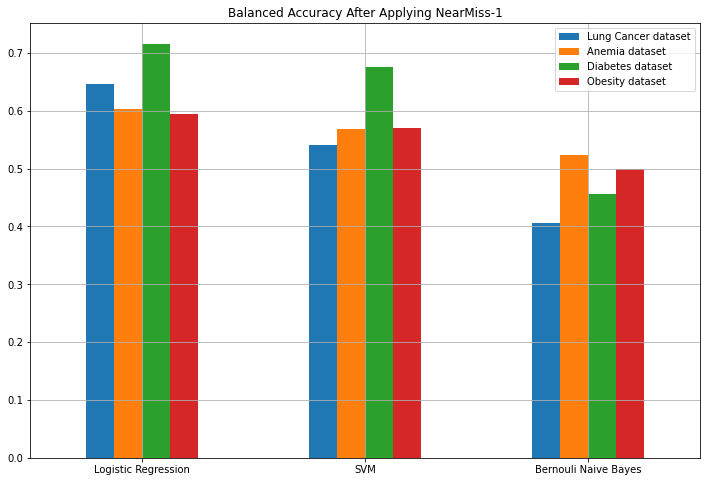

In [400]:
nearmiss_score_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying NearMiss-1")
plt.grid()
plt.xticks(rotation = 0)
plt.savefig('Balanced Accuracy After Applying NearMiss-1.jpg',bbox_inches='tight')

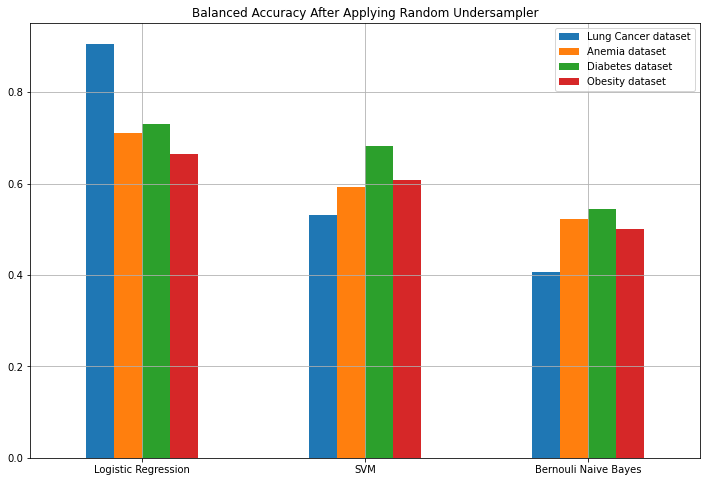

In [401]:
rwu_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Random Undersampler")
plt.grid(which='major')
plt.xticks(rotation = 0)
plt.savefig('Balanced Accuracy After Applying Random Undersampler.jpg',bbox_inches='tight')
plt.show()

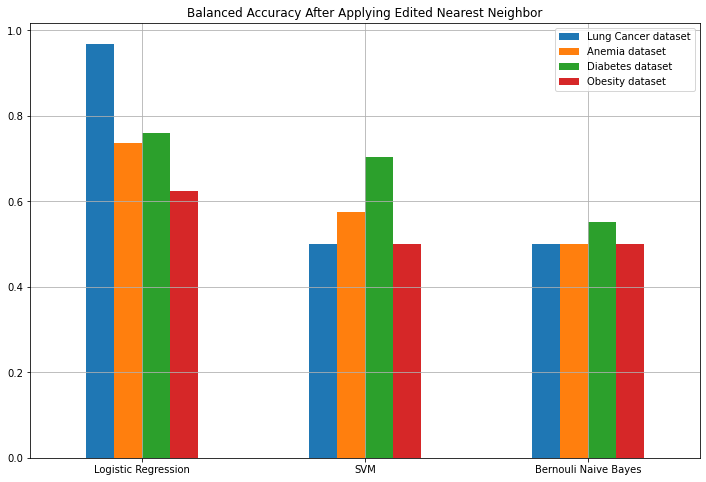

In [402]:
enn_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Edited Nearest Neighbor")
plt.grid(which='major')
plt.xticks(rotation = 0)
plt.savefig('Balanced Accuracy After Applying Edited Nearest Neighbor.jpg',bbox_inches='tight')
plt.show()

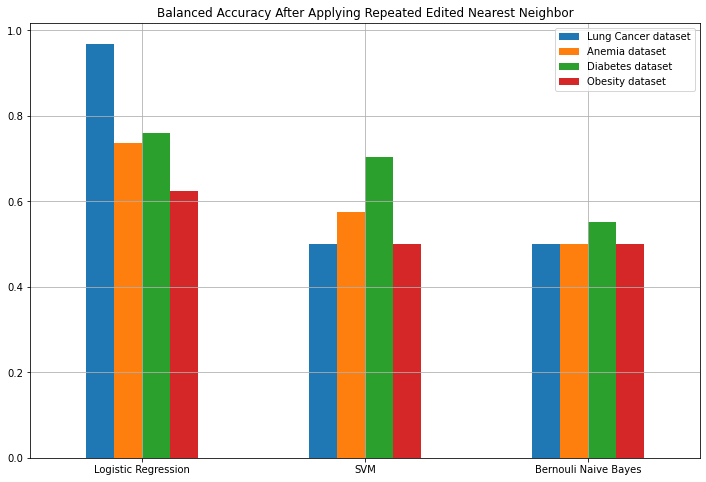

In [403]:
renn_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Repeated Edited Nearest Neighbor")
plt.grid(which='major')
plt.xticks(rotation = 0)
plt.savefig('Balanced Accuracy After Applying Repeated Edited Nearest Neighbor.jpg',bbox_inches='tight')
plt.show()

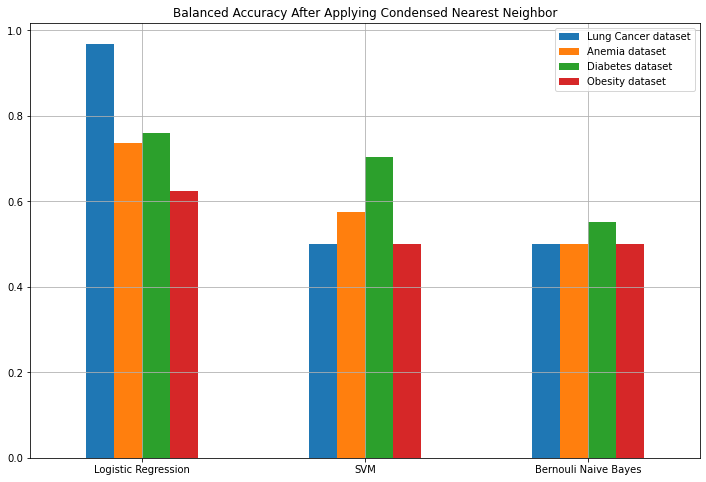

In [404]:
cnn_scores_df.T.loc['Balanced Accuracy'].plot(kind='bar', figsize=(12,8),
                                              title="Balanced Accuracy After Applying Condensed Nearest Neighbor")
plt.grid(which='major')
plt.xticks(rotation = 0)
plt.savefig('Balanced Accuracy After Applying Condensed Nearest Neighbor.jpg',bbox_inches='tight')
plt.show()

# Comaprison

In [436]:
presamp = presampling_scores_df.T.loc["Balanced Accuracy"].loc[["Logistic Regression"]].T.\
                                                        rename(columns={"Logistic Regression":"Before Resampling"})
oversamp = rwu_scores_df.T.loc["Balanced Accuracy"].loc[["Logistic Regression"]].T.\
                                                        rename(columns={"Logistic Regression":"Random Oversampler"})
undersamp = renn_scores_df.T.loc["Balanced Accuracy"].loc[["Logistic Regression"]].T.\
                                                        rename(columns={"Logistic Regression":"RENN"})

final_comp = pd.concat([presamp,oversamp, undersamp], axis=1)

final_comp

,Before Resampling,Random Oversampler,RENN
Lung Cancer dataset,0.739583,0.906250,0.968750
Anemia dataset,0.677918,0.709668,0.735984
Diabetes dataset,0.669259,0.731111,0.760185
Obesity dataset,0.520332,0.663956,0.623455


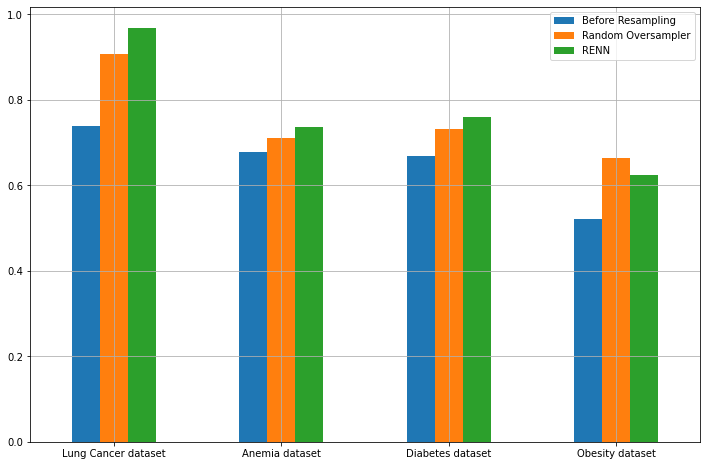

In [438]:
final_comp.plot(kind='bar', figsize=(12,8))
plt.grid(which='major')
plt.ylabel("Balanced Accuracy")
plt.xticks(rotation = 0)
plt.savefig('comparison plot.jpg',bbox_inches='tight')
plt.show()